# Tratamento dos dados e análise

```python
# Vamos primeiro importar os datasets

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
bts = pd.read_csv('data\Bts.csv')
meds_train = pd.read_csv("data\meds_train_alunos.csv")
meds_test = pd.read_csv("data\meds_test_alunos.csv")

In [73]:
meds_opt = pd.melt(
    meds_train,
    id_vars=['ponto_id', 'delay_1', 'delay_2', 'delay_3', 'lat', 'lon', 'indoor'],
    value_vars=['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'],
    var_name='rssi_id',
    value_name='rssi_value'
)

merged_df = pd.merge(
    bts,
    meds_opt,
    left_on='RssiId',
    right_on='rssi_id',
)

merged_df.to_csv('./data/train_dataset.csv', index=False)

In [74]:
meds_opt_test = pd.melt(
    meds_test,
    id_vars=['ponto_id', 'delay_1', 'delay_2', 'delay_3'],
    value_vars=['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'],
    var_name='rssi_id',
    value_name='rssi_value'
)

merged_df_test = pd.merge(
    bts,
    meds_opt_test,
    left_on='RssiId',
    right_on='rssi_id',
)

merged_df_test.to_csv('./data/test_dataset.csv', index=False)

In [75]:
merged_df.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,-91.530000
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,-80.246429
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,-98.748000
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,-115.000000
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,-100.830000


In [76]:
merged_df_test.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,0,5.0,3.0,2.0,rssi_1_1,-115.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,3,5.0,3.0,2.0,rssi_1_1,-115.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,8,5.0,3.0,2.0,rssi_1_1,-115.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,10,5.0,3.0,2.0,rssi_1_1,-115.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,12,5.0,3.0,2.0,rssi_1_1,-115.0
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,14,5.0,3.0,2.0,rssi_1_1,-115.0
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,17,5.0,3.0,2.0,rssi_1_1,-115.0
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,19,5.0,3.0,2.0,rssi_1_1,-115.0
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,23,5.0,3.0,2.0,rssi_1_1,-115.0
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,rssi_1_1,29,5.0,3.0,2.0,rssi_1_1,-115.0


In [77]:
merged_df.drop(columns=['RssiId'], inplace=True)

In [78]:
merged_df_test.drop(columns=['RssiId'], inplace=True)

In [79]:
merged_df.to_csv('./data/train_dataset.csv', index=False)

In [80]:
merged_df_test.to_csv('./data/test_dataset.csv', index=False)

In [81]:
merged_df.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,-91.530000
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,-80.246429
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,-98.748000
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,-115.000000
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,-100.830000


In [82]:
merged_df_test.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,rssi_1_1,-115.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,rssi_1_1,-115.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,rssi_1_1,-115.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,rssi_1_1,-115.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,rssi_1_1,-115.0
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,rssi_1_1,-115.0
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,rssi_1_1,-115.0
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,rssi_1_1,-115.0
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,rssi_1_1,-115.0
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,rssi_1_1,-115.0


## Data Science

```python
# Vamos começar analisando os valores após o merge 

In [83]:
rssi_id_counts = merged_df['rssi_id'].value_counts()

# Display the counts
print(rssi_id_counts)


rssi_id
rssi_1_1    6775
rssi_1_2    6775
rssi_1_3    6775
rssi_2_1    6775
rssi_2_2    6775
rssi_2_3    6775
rssi_3_1    6775
rssi_3_2    6775
rssi_3_3    6775
Name: count, dtype: int64


In [84]:
rssi_id_counts_test = merged_df_test['rssi_id'].value_counts()

# Display the counts
print(rssi_id_counts_test)


rssi_id
rssi_1_1    2904
rssi_1_2    2904
rssi_1_3    2904
rssi_2_1    2904
rssi_2_2    2904
rssi_2_3    2904
rssi_3_1    2904
rssi_3_2    2904
rssi_3_3    2904
Name: count, dtype: int64


In [85]:
btss_id_counts = merged_df['btsId'].value_counts()

# Display the counts
print(btss_id_counts)

btsId
BTS_1_1    6775
BTS_1_2    6775
BTS_1_3    6775
BTS_2_1    6775
BTS_2_2    6775
BTS_2_3    6775
BTS_3_1    6775
BTS_3_2    6775
BTS_3_3    6775
Name: count, dtype: int64


In [86]:
btss_id_counts_test = merged_df_test['btsId'].value_counts()

# Display the counts
print(btss_id_counts_test)

btsId
BTS_1_1    2904
BTS_1_2    2904
BTS_1_3    2904
BTS_2_1    2904
BTS_2_2    2904
BTS_2_3    2904
BTS_3_1    2904
BTS_3_2    2904
BTS_3_3    2904
Name: count, dtype: int64


```python
# Valores faltantes

In [87]:
merged_df.isnull().sum()

grupo         0
btsId         0
btsNetNome    0
lat_x         0
lon_x         0
cch           0
azimuth       0
ponto_id      0
delay_1       0
delay_2       0
delay_3       0
lat_y         0
lon_y         0
indoor        0
rssi_id       0
rssi_value    0
dtype: int64

In [88]:
merged_df_test.isnull().sum()

grupo         0
btsId         0
btsNetNome    0
lat           0
lon           0
cch           0
azimuth       0
ponto_id      0
delay_1       0
delay_2       0
delay_3       0
rssi_id       0
rssi_value    0
dtype: int64

```python
# Valores duplicados


In [89]:
merged_df.duplicated().sum()

0

In [90]:
merged_df_test.duplicated().sum()

0

## Detecção de outliers

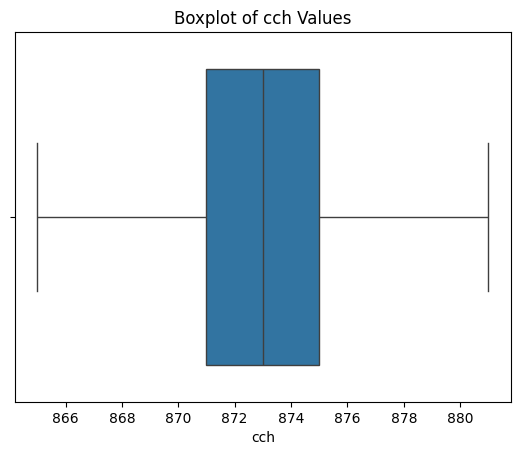

Number of outliers detected: 0


In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it has been loaded correctly.

# Visualizing outliers with a boxplot
sns.boxplot(x=merged_df['cch'])
plt.title('Boxplot of cch Values')
plt.show()

# Detecting outliers using the IQR method
Q1 = merged_df['cch'].quantile(0.25)
Q3 = merged_df['cch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_df[(merged_df['cch'] < lower_bound) | (merged_df['cch'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])

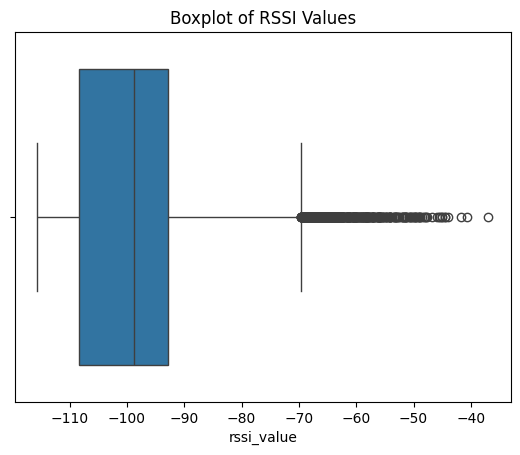

Number of outliers detected: 590


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it has been loaded correctly.

# Visualizing outliers with a boxplot
sns.boxplot(x=merged_df['rssi_value'])
plt.title('Boxplot of RSSI Values')
plt.show()

# Detecting outliers using the IQR method
Q1 = merged_df['rssi_value'].quantile(0.25)
Q3 = merged_df['rssi_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_df[(merged_df['rssi_value'] < lower_bound) | (merged_df['rssi_value'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])

### Resultados

- Não vamos tratar os valores de latitude ou longitude, nosso conhecimento não nos permite afirmar que tal tratamento não iria interferir no resultado final

## Removendo outliers da coluna rssi_value


```python
# Agora vamos primeiro estudar a distribuição de ocorrências ( histograma ) da coluna rssi_value

In [93]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import numpy as np

output_notebook()  # To display the plot in a Jupyter notebook

# Create a new plot with a title and axis labels
p = figure(title="Interactive Histogram of RSSI Values", x_axis_label='RSSI Value', y_axis_label='Frequency', tools="pan,wheel_zoom,box_zoom,reset,save")

# Add a histogram to the plot
hist, edges = np.histogram(merged_df['rssi_value'], bins=30)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white")

# Add hover tool
hover = HoverTool(tooltips=[("Range", "@left to @right"), ("Frequency", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


Loading BokehJS ...

In [94]:
import plotly.express as px

# Assuming 'merged_df' is your DataFrame
fig = px.histogram(merged_df, x='rssi_value', nbins=30, title='Interactive Histogram of RSSI Values')
fig.update_layout(bargap=0.1)  # Adjust the gap between bars
fig.show()


## Removendo outliers

In [95]:
# Assuming 'merged_df' and 'outliers' are DataFrame objects
num_actual = merged_df.shape[0]  # Total number of entries in the original DataFrame
num_out = outliers.shape[0]  # Number of outliers

print("Total number of entries:", num_actual)
print("Number of outliers:", num_out)

# Calculate the percentage of outliers
percent = ((num_actual-num_out) / num_actual) * 100
percent = (percent - 100) * -1
print("Quantidade de outliers: {00:.2f}%".format(percent))


Total number of entries: 60975
Number of outliers: 590
Quantidade de outliers: 0.97%


```python
# Temos então apenas 00,97% de outliers, ou seja, 99,03% dos nossos dados não apresental tal problema, diante de tal situação, vamos apenas remover os poucos outliers

In [96]:
merged_df.shape[0]

60975

In [97]:
merged_df = merged_df[~merged_df['rssi_value'].isin(outliers['rssi_value'])]

In [98]:
merged_df.shape[0]

60385

In [99]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import numpy as np

output_notebook()  # To display the plot in a Jupyter notebook

# Create a new plot with a title and axis labels
p = figure(title="Interactive Histogram of RSSI Values", x_axis_label='RSSI Value', y_axis_label='Frequency', tools="pan,wheel_zoom,box_zoom,reset,save")

# Add a histogram to the plot
hist, edges = np.histogram(merged_df['rssi_value'], bins=30)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white")

# Add hover tool
hover = HoverTool(tooltips=[("Range", "@left to @right"), ("Frequency", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


Loading BokehJS ...

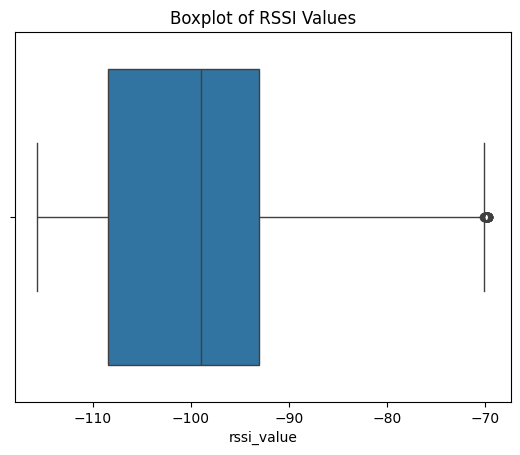

Number of outliers detected: 28


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it has been loaded correctly.

# Visualizing outliers with a boxplot
sns.boxplot(x=merged_df['rssi_value'])
plt.title('Boxplot of RSSI Values')
plt.show()

# Detecting outliers using the IQR method
Q1 = merged_df['rssi_value'].quantile(0.25)
Q3 = merged_df['rssi_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_df[(merged_df['rssi_value'] < lower_bound) | (merged_df['rssi_value'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])

In [101]:
merged_df = merged_df[~merged_df['rssi_value'].isin(outliers['rssi_value'])]

In [102]:
merged_df.shape[0]

60357

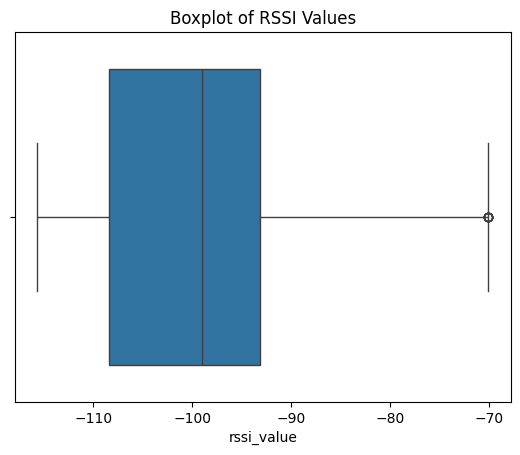

Number of outliers detected: 8


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it has been loaded correctly.

# Visualizing outliers with a boxplot
sns.boxplot(x=merged_df['rssi_value'])
plt.title('Boxplot of RSSI Values')
plt.show()

# Detecting outliers using the IQR method
Q1 = merged_df['rssi_value'].quantile(0.25)
Q3 = merged_df['rssi_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_df[(merged_df['rssi_value'] < lower_bound) | (merged_df['rssi_value'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])

In [104]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import numpy as np

output_notebook()  # To display the plot in a Jupyter notebook

# Create a new plot with a title and axis labels
p = figure(title="Interactive Histogram of RSSI Values", x_axis_label='RSSI Value', y_axis_label='Frequency', tools="pan,wheel_zoom,box_zoom,reset,save")

# Add a histogram to the plot
hist, edges = np.histogram(merged_df['rssi_value'], bins=30)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white")

# Add hover tool
hover = HoverTool(tooltips=[("Range", "@left to @right"), ("Frequency", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


Loading BokehJS ...

### Novo resultado

- Aqui vemos a diferença na distribuição dos dados, 

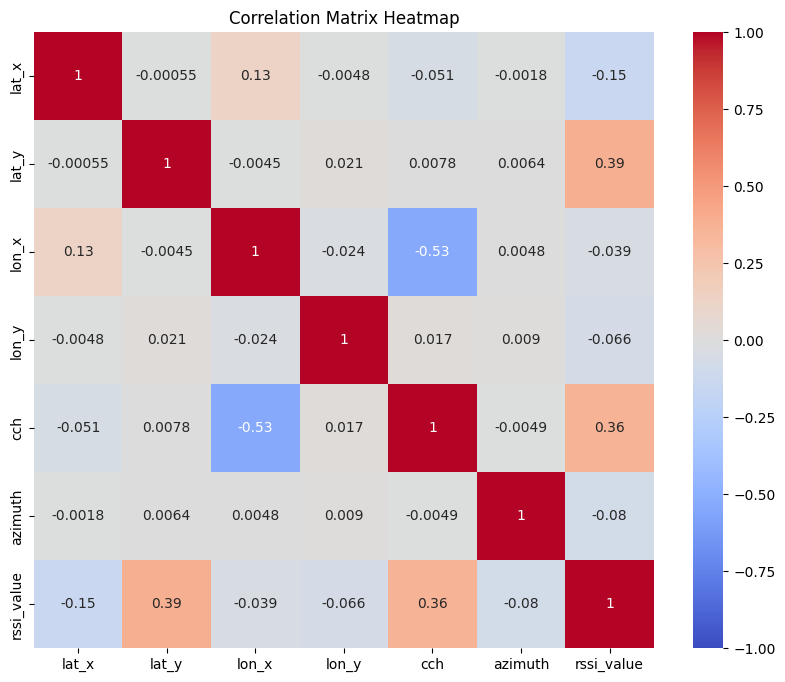

In [105]:

# convert necessary columns to numeric types
merged_df['lat_x'] = pd.to_numeric(merged_df['lat_x'], errors='coerce')
merged_df['lat_y'] = pd.to_numeric(merged_df['lat_y'], errors='coerce')
merged_df['lon_x'] = pd.to_numeric(merged_df['lon_x'], errors='coerce')
merged_df['lon_y'] = pd.to_numeric(merged_df['lon_y'], errors='coerce')
merged_df['cch'] = pd.to_numeric(merged_df['cch'], errors='coerce')
merged_df['azimuth'] = pd.to_numeric(merged_df['azimuth'], errors='coerce')
merged_df['rssi_value'] = pd.to_numeric(merged_df['rssi_value'], errors='coerce')

# select relevant columns
relevant_columns = ['lat_x', 'lat_y', 'lon_x', 'lon_y', 'cch', 'azimuth', 'rssi_value']

# correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Análise da Matriz de Correlação das Variáveis Selecionadas

A matriz de correlação ilustra as relações entre várias variáveis numéricas importantes do dataset. Cada célula mostra o coeficiente de correlação entre duas variáveis, variando de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação.


## Principais Observações

- **Correlações Fortes Negativas**:
  - `delay_1` e `delay_2` apresentam uma correlação de -0.93, indicando uma relação inversa muito forte. Isso sugere que, conforme o valor de `delay_1` aumenta, o valor de `delay_2` tende a diminuir significativamente e vice-versa.
  - `lon_y` e `delay_2` também mostram uma forte correlação negativa de -0.94, assim como `lon_y` e `delay_3` (-0.94), o que pode indicar uma relação geométrica ou de timing específica que afeta essas variáveis.

- **Correlações Fortes Positivas**:
  - As coordenadas `lat_y` e `lon_y` têm uma correlação perfeita de 1.00, sugerindo que são, possivelmente, coordenadas de um mesmo ponto ou linha.
  - `delay_2` e `delay_3` também estão altamente correlacionados (0.73), o que pode indicar uma dependência ou uma causalidade entre esses tempos de atraso.

## Conclusão

A compreensão dessas correlações é crucial para desenvolver modelos preditivos mais eficazes e para aprofundar nossa análise exploratória de dados. As correlações negativas fortes entre `delay_1`, `delay_2` e `lon_y` são particularmente interessantes e podem ser objeto de análise mais detalhada para entender as dinâmicas subjacentes.



## Normalização / Discretização

```python
# No caso, vamos mais uma vez printar aqui nosso dataset
merged_df.head(10)

In [106]:
merged_df.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,-91.530000
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,-80.246429
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,-98.748000
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,-115.000000
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,-100.830000


### Observe
- Colunas como ``Rssi_value`` podem beneficiar fortemente de tratamento na escala de seus valores, porém vamos guardar tal resultado em outro dataset, pois não sabemos se alguns algoritmos que possamos vir a escolher são atrapalhados por tal escolha
```python
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler() 

columns_to_normalize = ['rssi_value']
merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])
merged_df.to_csv('./data/train_normalized_dataset.csv', index=False)

merged_df.head()


,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,0.261743
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,0.228380
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,0.285777
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,0.581431
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,0.143584


In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler() 

columns_to_normalize = ['rssi_value']
merged_df_test[columns_to_normalize] = scaler.fit_transform(merged_df_test[columns_to_normalize])
merged_df_test.to_csv('./data/test_normalized_dataset.csv', index=False)

merged_df_test.head()

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,rssi_1_1,0.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,rssi_1_1,0.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,rssi_1_1,0.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,rssi_1_1,0.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,rssi_1_1,0.0
